In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

# Generating a List of Primes

An old algorithm for generating primes is the **Sieve of Eratosthenes** - it can be visualized by crossing out multiples of the smallest number.  If you try to program the algorithm, there are problems with taking that instructions too literally.  Here we generate primes up to 100 million.

In [2]:
import time
import numpy as np

t = time.time()

N = 1000000
x = np.zeros(N).astype(int)
x[0] = 1
x[1] = 1

p = 0
while( p < np.sqrt(N)):
    p = p + 1
    while(x[p] == 1):
        p += 1
    x[2*p::p] = 1
    
P = np.where(x == 0)[0]

for k in 1+np.arange(100-1):
    print k,
    x = np.zeros(N).astype(int)
    for p in P[P < np.sqrt((k+1)*N)]:
        if( (k*N)% p == 0):
            x[0] = 1
        x[ p - (k*N % p)::p] = 1

    P = np.hstack((P, np.where(x == 0)[0] + k*N))

print time.time() - t
P.shape

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 2.66869807243


(5761455,)

In [3]:
#1 Squarefree nmbers

P[P < 100]

n = (np.zeros(100) + 1).astype(int)

for p in P[P < 100]:
    print p,
    n[::p**2] = 0
    
n[n==1].size*1.0/100, 6.0/np.pi**2

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97

(0.61, 0.6079271018540267)

In [9]:
for k in range(1, 100):
    print n[k],
    if( k % 10  == 0):
        print 

1 1 1 0 1 1 1 0 0 1
1 0 1 1 1 0 1 0 1 0
1 1 1 0 0 1 0 0 1 1
1 0 1 1 1 0 1 1 1 0
1 1 1 0 0 1 1 0 0 0
1 0 1 0 1 0 1 1 1 0
1 1 0 0 1 1 1 0 1 1
1 0 1 1 0 0 1 1 1 0
0 1 1 0 1 1 1 0 1 0
1 0 1 1 1 0 1 0 0


# Fourier Series of SquareFree Numbers

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199

(-0.5, 1.5)

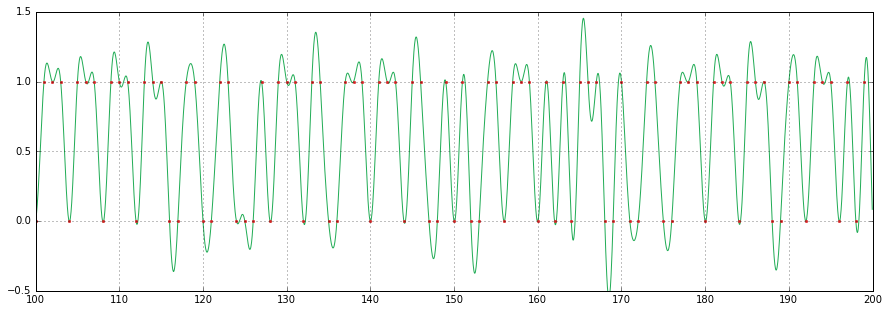

In [73]:
plt.rcParams['figure.figsize'] = 15,5


L = 200
P[P < L]

n = (np.zeros(L) + 1).astype(int)

for p in P[P < L]:
    print p,
    n[::p**2] = 0

M = 25
t = np.arange(L)
s = np.arange(0,L,1.0/M)
f = np.zeros(L*M)*1j

for k in np.arange(-L/2,L/2, 1.0/M):
    f += np.sum(n*np.exp(-2.0j*np.pi*k*t/L))*np.exp(2.0j*np.pi*k*s/L)

plt.plot(s,f/L/M, '-', color='#23AD57')    
plt.plot(s[::M],f[::M]/L/M, '.', color='#D92124', markersize=5)
plt.xticks(10*np.arange(L/10+1))
plt.grid(True)
plt.xlim([100,200])
plt.ylim([-0.5,1.5])

In [28]:
np.where(np.abs(f) < 0.01)[0]/2

array([ 0,  4,  8,  9, 12, 16, 18, 20, 24, 25, 27, 28, 32, 36, 40, 44, 45,
       48, 49, 50, 52, 54, 56, 60, 63, 64, 68, 72, 75, 76, 80, 81, 84, 88,
       90, 92, 96, 98, 99])

In [38]:
np.where( np.abs(np.abs(f)/100 - 2) < 0.01)[0]/2

array([ 1,  2,  3,  5,  6,  7, 10, 11, 13, 14, 15, 17, 19, 21, 22, 23, 26,
       29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 46, 47, 51, 53, 55,
       57, 58, 59, 61, 62, 65, 66, 67, 69, 70, 71, 73, 74, 77, 78, 79, 82,
       83, 85, 86, 87, 89, 91, 93, 94, 95, 97])